<a href="https://www.kaggle.com/code/ikomanggg28/brain-tumor-classification?scriptVersionId=145413931" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification/Training/no_tumor/image(224).jpg
/kaggle/input/brain-tumor-classification/Training/n

In [2]:
import os
import cv2
import random
import shutil
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_dir = '/kaggle/input/brain-tumor-classification/Training'
validation_dir = '/kaggle/input/brain-tumor-classification/Testing'

In [4]:
classes = os.listdir(train_dir)
print(classes)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [5]:
classes = os.listdir(validation_dir)
print(classes)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [6]:
X = []
y = []
image_size = 150
for i in classes:
    folderPath = os.path.join(train_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X.append(img)
        y.append(i)
        
for i in classes:
    folderPath = os.path.join(validation_dir,i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X.append(img)
        y.append(i)
        
X = np.array(X)
y = np.array(y)

100%|██████████| 100/100 [00:01<00:00, 78.03it/s]


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(classes.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(classes.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale = 1./255.,
    width_shift_range = 0.3,
    height_shift_range = 0.3,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
    vertical_flip = True)

img_datagen.fit(X_train)
img_datagen.fit(X_test)

**MOBILENET**

In [10]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [11]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape = (150,150, 3))
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
preds=Dense(4,activation='softmax')(x)

17225924/17225924 [==============================] - 0s 0us/step


In [12]:
len(base_model.layers)

86

In [13]:
model_mobilenet=Model(inputs=base_model.input,outputs=preds)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_mobilenet.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model_mobilenet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 75, 75, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 75, 75, 32)       128       
 ation)                                                      

In [15]:
history = model_mobilenet.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 27s 73ms/step - loss: 0.6945 - accuracy: 0.7269 - val_loss: 0.6371 - val_accuracy: 0.7580
Epoch 2/10
82/82 [==============================] - 4s 53ms/step - loss: 0.2443 - accuracy: 0.9219 - val_loss: 0.3974 - val_accuracy: 0.8515
Epoch 3/10
82/82 [==============================] - 4s 53ms/step - loss: 0.1036 - accuracy: 0.9732 - val_loss: 0.2314 - val_accuracy: 0.9296
Epoch 4/10
82/82 [==============================] - 4s 53ms/step - loss: 0.0529 - accuracy: 0.9866 - val_loss: 0.2200 - val_accuracy: 0.9265
Epoch 5/10
82/82 [==============================] - 4s 54ms/step - loss: 0.0355 - accuracy: 0.9912 - val_loss: 0.2621 - val_accuracy: 0.9173
Epoch 6/10
82/82 [==============================] - 4s 54ms/step - loss: 0.0202 - accuracy: 0.9958 - val_loss: 0.2535 - val_accuracy: 0.9311
Epoch 7/10
82/82 [==============================] - 5s 55ms/step - loss: 0.0152 - accuracy: 0.9958 - val_loss: 0.2116 - val_accuracy: 0.9449
Epoch 8/10
8

In [16]:
def plot_acc_model(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    plt.show()
    
def plot_loss_model(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.figure()
    plt.show()

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

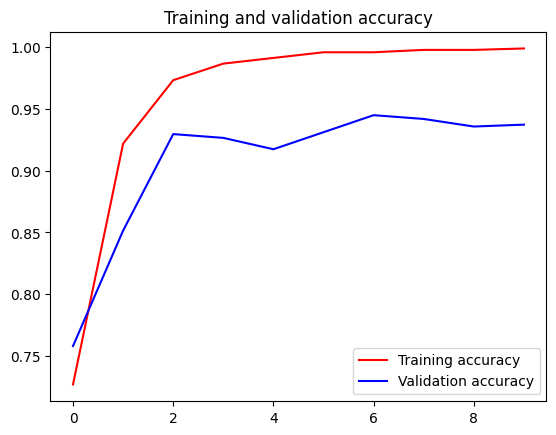

<Figure size 640x480 with 0 Axes>

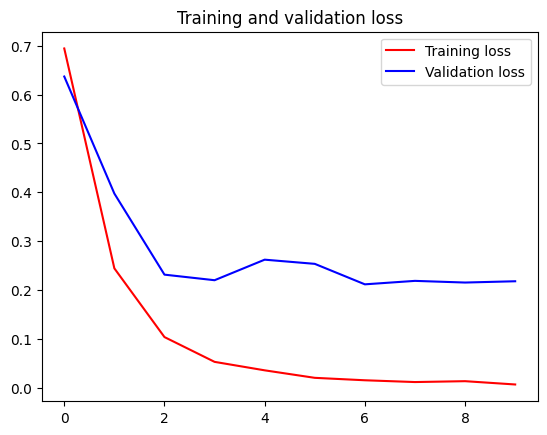

<Figure size 640x480 with 0 Axes>

In [18]:
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)

**VGG16**

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [20]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

In [22]:
model_vgg16 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
model_vgg16.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [24]:
history = model_vgg16.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 13s 116ms/step - loss: 1.6049 - accuracy: 0.6511 - val_loss: 0.6865 - val_accuracy: 0.7504
Epoch 2/10
82/82 [==============================] - 6s 79ms/step - loss: 0.3592 - accuracy: 0.8744 - val_loss: 0.5304 - val_accuracy: 0.8116
Epoch 3/10
82/82 [==============================] - 7s 80ms/step - loss: 0.1925 - accuracy: 0.9403 - val_loss: 0.4693 - val_accuracy: 0.8392
Epoch 4/10
82/82 [==============================] - 8s 96ms/step - loss: 0.1096 - accuracy: 0.9740 - val_loss: 0.4223 - val_accuracy: 0.8637
Epoch 5/10
82/82 [==============================] - 7s 81ms/step - loss: 0.0732 - accuracy: 0.9862 - val_loss: 0.4300 - val_accuracy: 0.8576
Epoch 6/10
82/82 [==============================] - 8s 97ms/step - loss: 0.0540 - accuracy: 0.9946 - val_loss: 0.4109 - val_accuracy: 0.8729
Epoch 7/10
82/82 [==============================] - 7s 84ms/step - loss: 0.0392 - accuracy: 0.9973 - val_loss: 0.4054 - val_accuracy: 0.8744
Epoch 8/10


In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

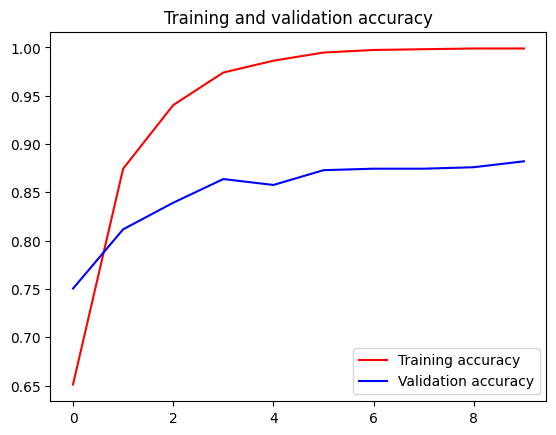

<Figure size 640x480 with 0 Axes>

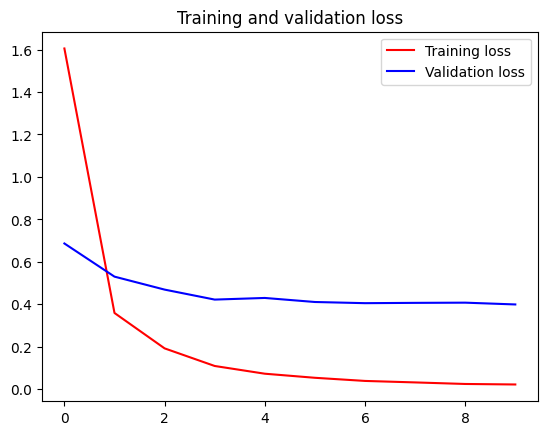

<Figure size 640x480 with 0 Axes>

In [26]:
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)

**INCEPTIONV3**

In [27]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [28]:
# Load pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

87910968/87910968 [==============================] - 1s 0us/step


In [29]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

In [30]:
model_inceptionv3 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001)
model_inceptionv3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model_inceptionv3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [32]:
history = model_vgg16.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 8s 97ms/step - loss: 0.0192 - accuracy: 0.9992 - val_loss: 0.3995 - val_accuracy: 0.8821
Epoch 2/10
82/82 [==============================] - 7s 82ms/step - loss: 0.0192 - accuracy: 0.9985 - val_loss: 0.4018 - val_accuracy: 0.8806
Epoch 3/10
82/82 [==============================] - 7s 83ms/step - loss: 0.0167 - accuracy: 0.9989 - val_loss: 0.4358 - val_accuracy: 0.8790
Epoch 4/10
82/82 [==============================] - 8s 99ms/step - loss: 0.0143 - accuracy: 0.9992 - val_loss: 0.4088 - val_accuracy: 0.8806
Epoch 5/10
82/82 [==============================] - 7s 86ms/step - loss: 0.0163 - accuracy: 0.9981 - val_loss: 0.4111 - val_accuracy: 0.8775
Epoch 6/10
82/82 [==============================] - 7s 85ms/step - loss: 0.0131 - accuracy: 0.9985 - val_loss: 0.3954 - val_accuracy: 0.8882
Epoch 7/10
82/82 [==============================] - 7s 84ms/step - loss: 0.0128 - accuracy: 0.9989 - val_loss: 0.4001 - val_accuracy: 0.8867
Epoch 8/10
82

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

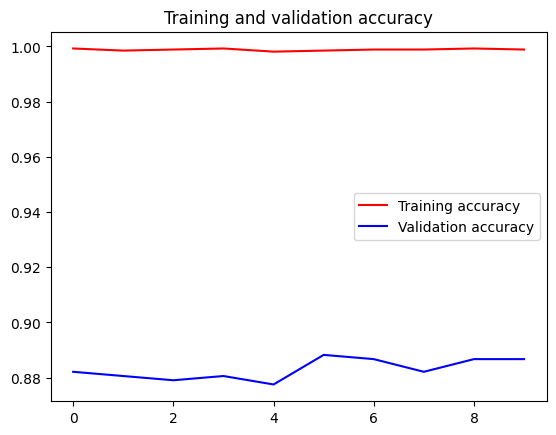

<Figure size 640x480 with 0 Axes>

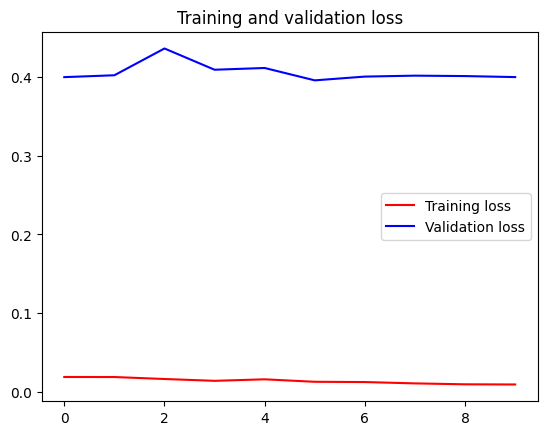

<Figure size 640x480 with 0 Axes>

In [34]:
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)

**RESNET152**

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [36]:
# Load pre-trained ResNet-152 model
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

234698864/234698864 [==============================] - 1s 0us/step


In [37]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

In [38]:
model_resnet152 = Model(inputs=base_model.input, outputs=output)
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
model_resnet152.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model_resnet152.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [40]:
history = model_vgg16.fit(X_train, y_train,
                              epochs=10,
                              validation_data=(X_test, y_test),
                              verbose=1)

Epoch 1/10
82/82 [==============================] - 8s 97ms/step - loss: 0.0096 - accuracy: 0.9989 - val_loss: 0.4068 - val_accuracy: 0.8851
Epoch 2/10
82/82 [==============================] - 7s 82ms/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.4033 - val_accuracy: 0.8882
Epoch 3/10
82/82 [==============================] - 8s 98ms/step - loss: 0.0095 - accuracy: 0.9989 - val_loss: 0.4141 - val_accuracy: 0.8775
Epoch 4/10
82/82 [==============================] - 7s 85ms/step - loss: 0.0094 - accuracy: 0.9989 - val_loss: 0.4516 - val_accuracy: 0.8836
Epoch 5/10
82/82 [==============================] - 7s 86ms/step - loss: 0.0104 - accuracy: 0.9992 - val_loss: 0.3994 - val_accuracy: 0.8851
Epoch 6/10
82/82 [==============================] - 7s 86ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.3973 - val_accuracy: 0.8867
Epoch 7/10
82/82 [==============================] - 8s 99ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.4013 - val_accuracy: 0.8867
Epoch 8/10
82

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

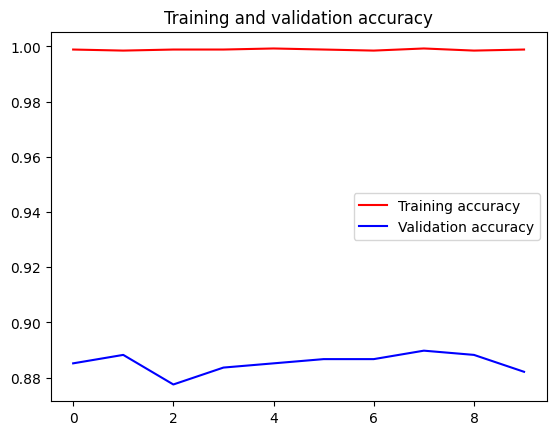

<Figure size 640x480 with 0 Axes>

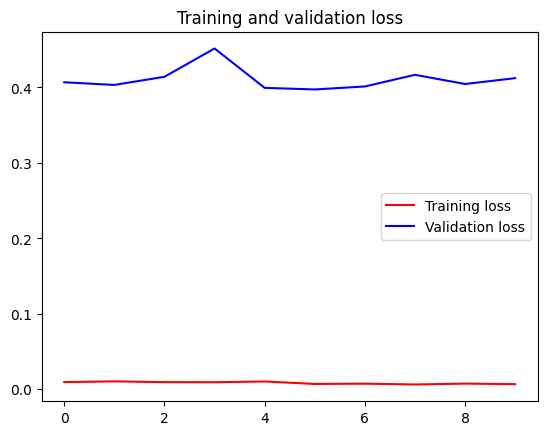

<Figure size 640x480 with 0 Axes>

In [42]:
plot_acc_model(acc, val_acc, epochs)
plot_loss_model(loss, val_loss, epochs)